<a href="https://colab.research.google.com/github/alex06733/Bode/blob/main/Bode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

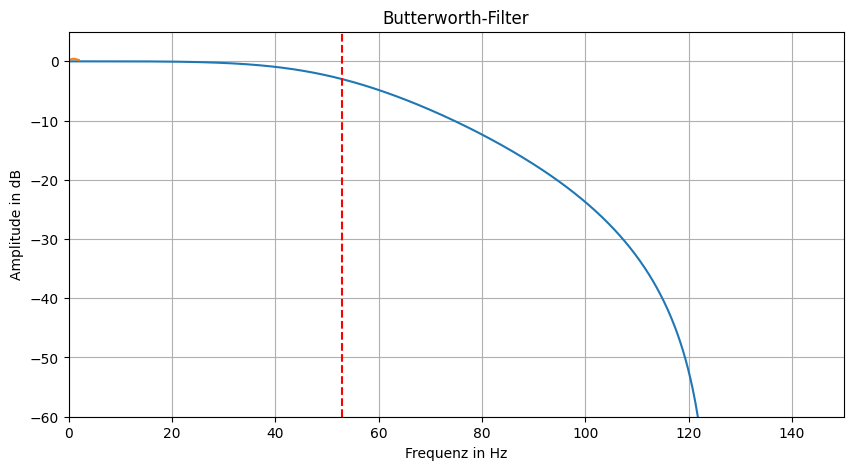

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

order=2  #Ordnung des filters
cutoff_freq=53 #Grenzfrequenz in Hz
sampling_rate=250 #Samplingrate in Hz

b,a=signal.butter(order, cutoff_freq, btype='low',analog=False,fs=sampling_rate)

w,h=signal.freqz(b,a)

frequencies=w*sampling_rate/(2*np.pi) #konvertiert digitale Frequenzen in Hz um
#Graph einstellen
plt.figure(figsize=(10,5))
plt.plot(frequencies,20*np.log10(np.abs(h)),b)
plt.xlabel('Frequenz in Hz')
plt.ylabel('Amplitude in dB')

plt.title('Butterworth-Filter')
plt.grid(True)
plt.xlim(0,150)
plt.ylim(-60,5)
plt.axvline(x=cutoff_freq,color='r',linestyle='--')
plt.show()